In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# 'unzipped_data/air-quality-across-countries-in-covid19_aestheteaman01/USA.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_counties_covid19_daily.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_covid19_daily.csv'
# 'unzipped_data/covid19-in-usa_sudalairajkumar/us_states_covid19_daily.csv'

In [3]:
usa_air_q_file = 'unzipped_data/air-quality-across-countries-in-covid19_aestheteaman01/USA.csv'
df_aq_us = pd.read_csv(usa_air_q_file,
                       parse_dates=['Date'],
                       dayfirst=True,
                       index_col='Date')
df_aq_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179365 entries, 2021-06-13 to 2021-08-15
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Country   179365 non-null  object 
 1   City      179365 non-null  object 
 2   Specie    179365 non-null  object 
 3   count     179365 non-null  int64  
 4   min       179365 non-null  float64
 5   max       179365 non-null  float64
 6   median    179365 non-null  float64
 7   variance  179365 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.3+ MB


In [4]:
df_aq_us.sort_index()

,Country,City,Specie,count,min,max,median,variance
Date,,,,,,,,
2020-12-28,UNITED STATES,Denver,wind-speed,138,0.2,6.0,2.0,16.90
2020-12-28,UNITED STATES,Richmond,no2,96,1.4,12.4,5.0,50.28
2020-12-28,UNITED STATES,Providence,pressure,72,958.6,1027.3,1018.3,7984.64
2020-12-28,UNITED STATES,Queens,temperature,120,-3.0,50.1,7.8,2454.29
2020-12-28,UNITED STATES,Honolulu,co,21,5.6,7.8,5.6,4.71
...,...,...,...,...,...,...,...,...
2021-12-07,UNITED STATES,Salt Lake City,pm25,81,10.0,69.0,52.0,1742.50
2021-12-07,UNITED STATES,Little Rock,pm25,10,13.0,26.0,19.0,182.33
2021-12-07,UNITED STATES,Charlotte,wind-gust,34,1.5,14.5,10.8,102.15


In [5]:
df_la = df_aq_us[df_aq_us['City']=='Los Angeles'].sort_index().drop(['Country','City'], axis=1)
df_la

,Specie,count,min,max,median,variance
Date,,,,,,
2020-12-28,pm25,70,5.0,57.0,19.0,1761.05
2020-12-28,co,23,1.8,4.7,2.6,3.74
2020-12-28,temperature,93,5.8,13.0,8.8,29.11
2020-12-28,dew,20,6.0,9.0,8.0,7.50
2020-12-28,humidity,93,71.0,96.0,92.0,332.55
...,...,...,...,...,...,...
2021-12-07,dew,4,10.0,11.0,10.0,3.33
2021-12-07,pm10,7,22.0,34.0,30.0,205.71
2021-12-07,wind-gust,9,0.6,2.4,1.4,3.44


In [6]:
df_la['Specie'].value_counts()

pm25           323
co             323
no2            323
temperature    322
humidity       322
pressure       322
wind-gust      321
wind-speed     321
o3             320
pm10           319
dew            317
so2            223
Name: Specie, dtype: int64

In [7]:
df_la.pivot_table(columns=['Specie'])

Specie,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed
count,23.801858,17.690852,75.074534,46.705882,22.756250,23.523511,68.671827,75.021739,5.067265,75.062112,35.090343,56.087227
max,7.819195,12.712934,89.530745,41.421981,42.292500,44.532915,95.024768,1017.277019,1.915247,24.613975,9.519003,6.377882
median,4.129102,10.385489,67.648447,18.688854,19.655000,27.705329,51.439628,1015.212112,1.727803,16.720186,2.175701,2.129595
min,2.341176,7.198107,38.357453,4.524768,5.636875,17.329154,15.380805,1010.306832,1.679372,12.509938,0.142679,0.116199
variance,36.246656,54.627729,2422.762671,1380.159071,1715.530062,734.952038,3677.995604,115.537236,1.122242,139.138230,96.015763,31.230779


In [8]:
df_la.columns

Index(['Specie', 'count', 'min', 'max', 'median', 'variance'], dtype='object')

<AxesSubplot:xlabel='Date,Specie'>

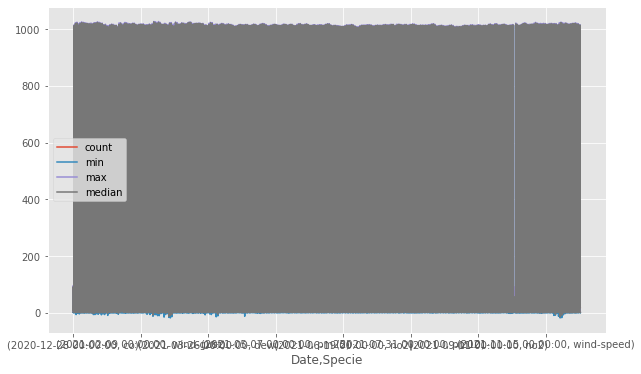

In [9]:
df_la.drop('variance', axis=1).reset_index().groupby(['Date','Specie']).median().plot()

In [10]:
df_la.groupby(['Specie']).median().drop(['variance','count'], axis=1)

,min,max,median
Specie,,,
co,2.2,6.90,3.40
dew,9.0,13.00,11.00
humidity,42.0,90.95,73.00
no2,3.8,38.90,16.70
o3,1.6,40.80,20.00
pm10,17.0,43.00,27.00
pm25,13.0,85.00,52.00
pressure,1012.7,1016.90,1014.80
so2,1.5,1.50,1.50


In [11]:
df_la.to_period('D').drop(['variance','count','min','max'], axis=1)

,Specie,median
Date,,
2020-12-28,pm25,19.0
2020-12-28,co,2.6
2020-12-28,temperature,8.8
2020-12-28,dew,8.0
2020-12-28,humidity,92.0
...,...,...
2021-12-07,dew,10.0
2021-12-07,pm10,30.0
2021-12-07,wind-gust,1.4


In [12]:
df_la[df_la['Specie']=='pm25'].to_period('D').drop(['variance','count','min','max'], axis=1)

,Specie,median
Date,,
2020-12-28,pm25,19.0
2020-12-29,pm25,43.0
2020-12-30,pm25,53.0
2020-12-31,pm25,57.0
2021-01-01,pm25,78.0
...,...,...
2021-12-03,pm25,98.0
2021-12-04,pm25,86.0
2021-12-05,pm25,93.0


<AxesSubplot:xlabel='Date'>

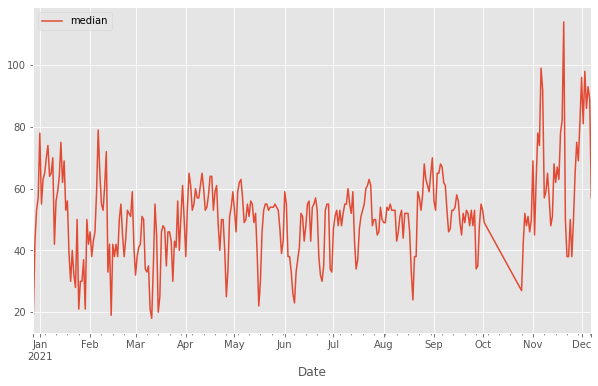

In [13]:
df_la[df_la['Specie']=='pm25'].to_period('D').drop(['variance','count','min','max'], axis=1).plot()

In [14]:
df_la.drop(['variance','count','min','max'], axis=1)

,Specie,median
Date,,
2020-12-28,pm25,19.0
2020-12-28,co,2.6
2020-12-28,temperature,8.8
2020-12-28,dew,8.0
2020-12-28,humidity,92.0
...,...,...
2021-12-07,dew,10.0
2021-12-07,pm10,30.0
2021-12-07,wind-gust,1.4


In [15]:
df_la.drop(['variance','count','min','max'], axis=1).pivot(columns='Specie')

median                                                       \
Specie         co   dew humidity   no2    o3  pm10  pm25 pressure  so2   
Date                                                                     
2020-12-28    2.6   8.0     92.0   8.4  24.1   6.0  19.0   1012.0  NaN   
2020-12-29    4.9   5.0     75.5  24.1   4.0  14.0  43.0   1019.7  NaN   
2020-12-30    5.3   2.0     48.7  32.5   1.6  21.0  53.0   1022.0  NaN   
2020-12-31    4.2   2.0     48.1  26.9  22.4  20.0  57.0   1014.8  1.5   
2021-01-01    6.7   3.0     47.4  23.2   3.2  27.0  78.0   1019.2  1.5   
...           ...   ...      ...   ...   ...   ...   ...      ...  ...   
2021-12-03    6.3   9.0     86.1  31.5  12.8  59.0  98.0   1019.7  NaN   
2021-12-04    5.4  10.0     83.7  24.1  16.0  50.0  86.0   1020.2  NaN   
2021-12-05    6.9  11.0     87.0  26.0   8.8  47.0  93.0   1018.3  NaN   
2021-12-06    9.4  11.0     84.6  29.7  18.4  47.0  89.0   1017.2  1.5   
2021-12-07    3.0  10.0     83.7  14.9  26.4  30.0  57.0   1014.7  NaN   

                                             
Specie     temperature wind-gust wind-speed  
Date                                         
2020-12-28         8.8       3.9        2.4  
2020-12-29         9.8       1.1        1.5  
2020-12-30        10.0       0.6        1.3  
2020-12-31        12.4       1.0        2.0  
2021-01-01        12.0       0.7        1.0  
...                ...       ...        ...  
2021-12-03        12.3       0.6        1.5  
2021-12-04        13.0       0.7        1.5  
2021-12-05        11.6       1.0        0.7  
2021-12-06        13.7       2.0        1.8  
2021-12-07        13.3       1.4        1.2  

[324 rows x 12 columns]

<AxesSubplot:xlabel='Date'>

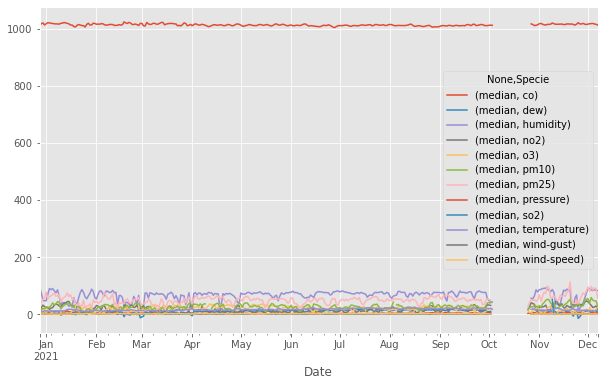

In [16]:
df_la.drop(['variance','count','min','max'], axis=1).to_period('D').pivot(columns='Specie').plot()

In [17]:
pv_df_la = df_la.drop(['variance','count','min','max'], axis=1).pivot(columns='Specie')
pv_df_la

median                                                       \
Specie         co   dew humidity   no2    o3  pm10  pm25 pressure  so2   
Date                                                                     
2020-12-28    2.6   8.0     92.0   8.4  24.1   6.0  19.0   1012.0  NaN   
2020-12-29    4.9   5.0     75.5  24.1   4.0  14.0  43.0   1019.7  NaN   
2020-12-30    5.3   2.0     48.7  32.5   1.6  21.0  53.0   1022.0  NaN   
2020-12-31    4.2   2.0     48.1  26.9  22.4  20.0  57.0   1014.8  1.5   
2021-01-01    6.7   3.0     47.4  23.2   3.2  27.0  78.0   1019.2  1.5   
...           ...   ...      ...   ...   ...   ...   ...      ...  ...   
2021-12-03    6.3   9.0     86.1  31.5  12.8  59.0  98.0   1019.7  NaN   
2021-12-04    5.4  10.0     83.7  24.1  16.0  50.0  86.0   1020.2  NaN   
2021-12-05    6.9  11.0     87.0  26.0   8.8  47.0  93.0   1018.3  NaN   
2021-12-06    9.4  11.0     84.6  29.7  18.4  47.0  89.0   1017.2  1.5   
2021-12-07    3.0  10.0     83.7  14.9  26.4  30.0  57.0   1014.7  NaN   

                                             
Specie     temperature wind-gust wind-speed  
Date                                         
2020-12-28         8.8       3.9        2.4  
2020-12-29         9.8       1.1        1.5  
2020-12-30        10.0       0.6        1.3  
2020-12-31        12.4       1.0        2.0  
2021-01-01        12.0       0.7        1.0  
...                ...       ...        ...  
2021-12-03        12.3       0.6        1.5  
2021-12-04        13.0       0.7        1.5  
2021-12-05        11.6       1.0        0.7  
2021-12-06        13.7       2.0        1.8  
2021-12-07        13.3       1.4        1.2  

[324 rows x 12 columns]

In [18]:
pv_df_la.describe()

median                                                  \
Specie          co         dew    humidity         no2          o3   
count   323.000000  317.000000  322.000000  323.000000  320.000000   
mean      4.129102   10.385489   67.648447   18.688854   19.655000   
std       2.084449    5.484458   15.892180    9.578557    8.679582   
min       1.500000  -14.000000   12.000000    2.800000    1.600000   
25%       2.700000    8.000000   63.075000   11.200000   13.600000   
50%       3.400000   11.000000   73.000000   16.700000   20.000000   
75%       5.050000   15.000000   77.000000   25.100000   26.400000   
max      14.700000   18.000000   93.000000   47.300000   36.800000   

                                                                     \
Specie        pm10        pm25     pressure         so2 temperature   
count   319.000000  323.000000   322.000000  223.000000  322.000000   
mean     27.705329   51.439628  1015.212112    1.727803   16.720186   
std       8.861318   13.921427     3.494242    3.401820    3.535551   
min       5.000000   18.000000  1006.000000    1.500000    8.700000   
25%      22.000000   43.000000  1012.800000    1.500000   14.000000   
50%      27.000000   52.000000  1014.800000    1.500000   16.850000   
75%      33.000000   58.000000  1017.600000    1.500000   19.700000   
max      59.000000  114.000000  1025.800000   52.300000   23.800000   

                                
Specie   wind-gust  wind-speed  
count   321.000000  321.000000  
mean      2.175701    2.129595  
std       1.367948    0.660513  
min       0.500000    0.400000  
25%       1.200000    1.700000  
50%       1.800000    2.000000  
75%       2.800000    2.500000  
max      10.200000    5.000000

In [19]:
pv_df_la.columns

MultiIndex([('median',          'co'),
            ('median',         'dew'),
            ('median',    'humidity'),
            ('median',         'no2'),
            ('median',          'o3'),
            ('median',        'pm10'),
            ('median',        'pm25'),
            ('median',    'pressure'),
            ('median',         'so2'),
            ('median', 'temperature'),
            ('median',   'wind-gust'),
            ('median',  'wind-speed')],
           names=[None, 'Specie'])

In [20]:
pv_df_la.columns.droplevel()

Index(['co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25', 'pressure', 'so2',
       'temperature', 'wind-gust', 'wind-speed'],
      dtype='object', name='Specie')

In [21]:
pv_df_la.columns = pv_df_la.columns.droplevel()
pv_df_la

Specie,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-gust,wind-speed
Date,,,,,,,,,,,,
2020-12-28,2.6,8.0,92.0,8.4,24.1,6.0,19.0,1012.0,NaN,8.8,3.9,2.4
2020-12-29,4.9,5.0,75.5,24.1,4.0,14.0,43.0,1019.7,NaN,9.8,1.1,1.5
2020-12-30,5.3,2.0,48.7,32.5,1.6,21.0,53.0,1022.0,NaN,10.0,0.6,1.3
2020-12-31,4.2,2.0,48.1,26.9,22.4,20.0,57.0,1014.8,1.5,12.4,1.0,2.0
2021-01-01,6.7,3.0,47.4,23.2,3.2,27.0,78.0,1019.2,1.5,12.0,0.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,6.3,9.0,86.1,31.5,12.8,59.0,98.0,1019.7,NaN,12.3,0.6,1.5
2021-12-04,5.4,10.0,83.7,24.1,16.0,50.0,86.0,1020.2,NaN,13.0,0.7,1.5
2021-12-05,6.9,11.0,87.0,26.0,8.8,47.0,93.0,1018.3,NaN,11.6,1.0,0.7


<AxesSubplot:xlabel='Date'>

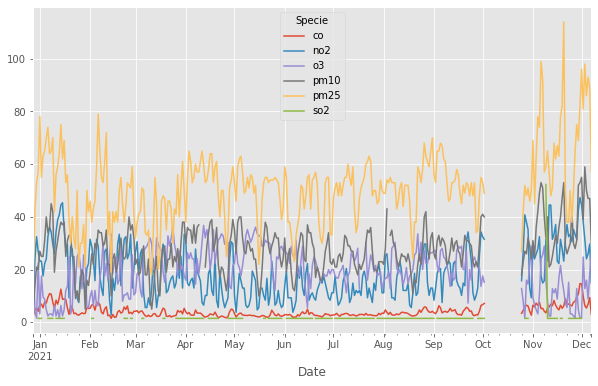

In [22]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1).to_period('D').plot()

<AxesSubplot:xlabel='Date'>

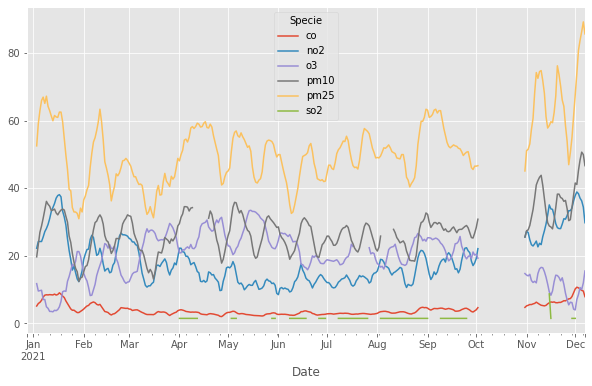

In [23]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=7, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

<AxesSubplot:xlabel='Date'>

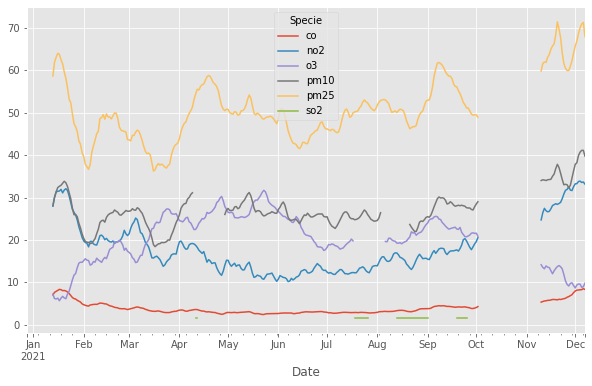

In [24]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=17, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

<AxesSubplot:xlabel='Date'>

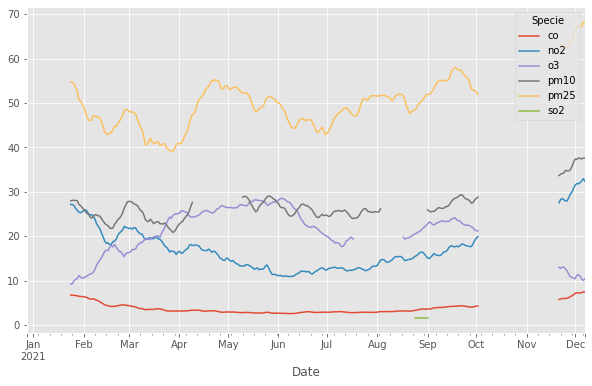

In [25]:
pv_df_la.drop(['dew',
               'humidity',
               'pressure',
               'wind-gust',
               'wind-speed',
               'temperature'],axis=1) \
        .rolling(window=28, center=False) \
        .mean() \
        .to_period('D') \
        .plot()

In [26]:
# Dataset:
# "COVID-19 Reported Patient Impact and Hospital Capacity by Facility"
# <https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/uqq2-txqb>
cov_dataset_name = 'COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_--_RAW.csv'

In [27]:
raw_cov_df = pd.read_csv(cov_dataset_name,
                         parse_dates=True,
                         na_values=-999999,
                         index_col='collection_week')
raw_cov_df.index

DatetimeIndex(['2022-01-28', '2022-01-28', '2022-01-28', '2022-01-28',
               '2022-01-28', '2022-01-28', '2022-01-28', '2022-01-28',
               '2022-01-28', '2022-01-28',
               ...
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31',
               '2020-07-31', '2020-07-31'],
              dtype='datetime64[ns]', name='collection_week', length=394846, freq=None)

In [28]:
raw_cov_df = raw_cov_df.sort_index()

In [29]:
raw_cov_df.columns

Index(['hospital_pk', 'state', 'ccn', 'hospital_name', 'address', 'city',
       'zip', 'hospital_subtype', 'fips_code', 'is_metro_micro',
       ...
       'previous_day_admission_adult_covid_confirmed_7_day_coverage',
       'previous_day_admission_pediatric_covid_confirmed_7_day_coverage',
       'previous_day_admission_adult_covid_suspected_7_day_coverage',
       'previous_day_admission_pediatric_covid_suspected_7_day_coverage',
       'previous_week_personnel_covid_vaccinated_doses_administered_7_day',
       'total_personnel_covid_vaccinated_doses_none_7_day',
       'total_personnel_covid_vaccinated_doses_one_7_day',
       'total_personnel_covid_vaccinated_doses_all_7_day',
       'previous_week_patients_covid_vaccinated_doses_one_7_day',
       'previous_week_patients_covid_vaccinated_doses_all_7_day'],
      dtype='object', length=107)

In [30]:
ED_cols = raw_cov_df.columns[raw_cov_df.columns.str.contains('ED')]
ED_cols

Index(['previous_day_covid_ED_visits_7_day_sum', 'previous_day_total_ED_visits_7_day_sum'], dtype='object')

In [31]:
raw_cov_df[ED_cols]

,previous_day_covid_ED_visits_7_day_sum,previous_day_total_ED_visits_7_day_sum
collection_week,,
2020-07-31,159.0,249.0
2020-07-31,0.0,12.0
2020-07-31,0.0,6.0
2020-07-31,6.0,157.0
2020-07-31,0.0,6.0
...,...,...
2022-01-28,0.0,0.0
2022-01-28,104.0,982.0
2022-01-28,159.0,1403.0


<AxesSubplot:xlabel='collection_week'>

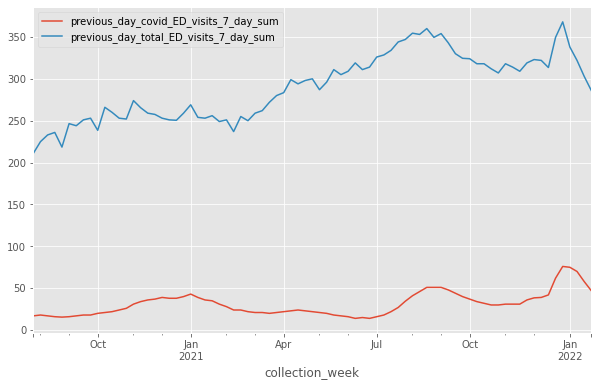

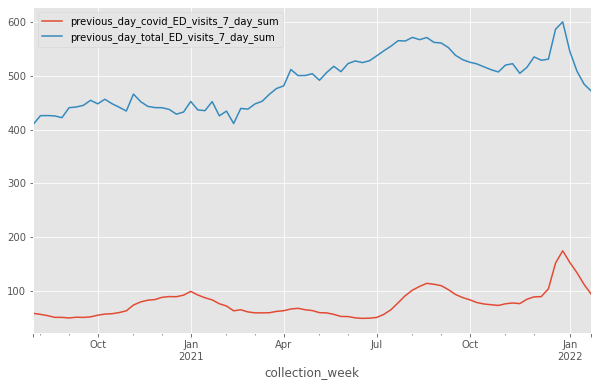

In [32]:
raw_cov_df[ED_cols].groupby(['collection_week']).median().plot()
raw_cov_df[ED_cols].groupby(['collection_week']).mean().plot()

In [33]:
df_temp_test_aq_la = pv_df_la.drop(['dew',
                                    'humidity',
                                    'pressure',
                                    'wind-gust',
                                    'wind-speed',
                                    'temperature'],axis=1)
df_cov_aq_la = raw_cov_df[ED_cols].groupby(['collection_week']).median()
df_cov_aq_la[df_temp_test_aq_la.columns] = df_temp_test_aq_la
df_cov_aq_la

,previous_day_covid_ED_visits_7_day_sum,previous_day_total_ED_visits_7_day_sum,co,no2,o3,pm10,pm25,so2
collection_week,,,,,,,,
2020-07-31,17.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-07,18.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,17.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-21,16.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-28,15.5,218.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-31,76.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,75.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-14,70.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN


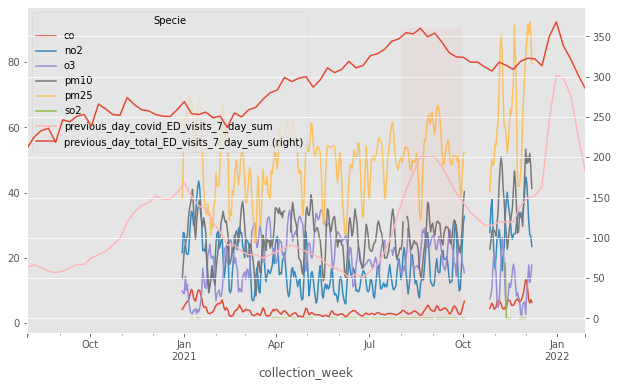

In [34]:
fig,ax = plt.subplots()
df_temp_test_aq_la = pv_df_la.drop(['dew',
                                    'humidity',
                                    'pressure',
                                    'wind-gust',
                                    'wind-speed',
                                    'temperature'],axis=1)
df_temp_test_aq_la.rolling(window=3).mean().to_period('D').plot(ax=ax)
raw_cov_df[ED_cols].groupby(['collection_week']) \
                   .median() \
                   .to_period('D') \
                   .plot(ax=ax,
                         secondary_y=['previous_day_total_ED_visits_7_day_sum'])
plt.fill_between(pd.date_range('2021-8','2021-10')[0:-1],360,alpha=0.05)

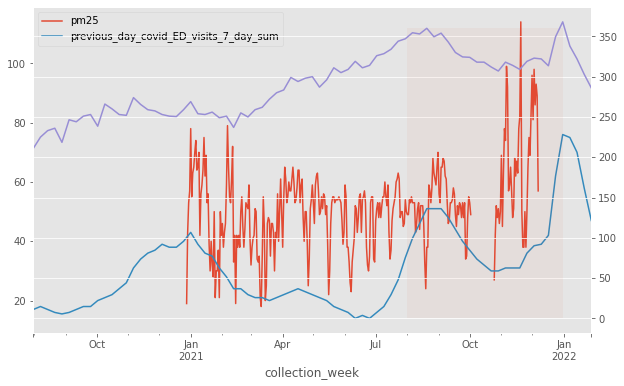

In [35]:
fig,ax = plt.subplots()
df_temp_test_aq_la = pv_df_la['pm25']
df_temp_test_aq_la.to_period('D').plot(ax=ax)
raw_cov_df[ED_cols].groupby(['collection_week']) \
                   .median() \
                   .to_period('D') \
                   .plot(ax=ax,
                         secondary_y=['previous_day_total_ED_visits_7_day_sum'])
plt.fill_between(pd.date_range('2021-8','2022-1')[0:-1],360,alpha=0.05)
ax.legend()

In [36]:
df_cov_gb_wk_med = raw_cov_df[ED_cols].groupby(['collection_week']).median()
df_cov_gb_wk_med['prop_cov'] = df_cov_gb_wk_med['previous_day_covid_ED_visits_7_day_sum'] / \
                               df_cov_gb_wk_med['previous_day_total_ED_visits_7_day_sum']
df_cov_gb_wk_med

,previous_day_covid_ED_visits_7_day_sum,previous_day_total_ED_visits_7_day_sum,prop_cov
collection_week,,,
2020-07-31,17.0,211.0,0.080569
2020-08-07,18.0,225.0,0.080000
2020-08-14,17.0,233.0,0.072961
2020-08-21,16.0,236.0,0.067797
2020-08-28,15.5,218.5,0.070938
...,...,...,...
2021-12-31,76.0,368.0,0.206522
2022-01-07,75.0,338.0,0.221893
2022-01-14,70.0,322.0,0.217391


In [37]:
df_temp_test_aq_la

Date
2020-12-28    19.0
2020-12-29    43.0
2020-12-30    53.0
2020-12-31    57.0
2021-01-01    78.0
              ... 
2021-12-03    98.0
2021-12-04    86.0
2021-12-05    93.0
2021-12-06    89.0
2021-12-07    57.0
Name: pm25, Length: 324, dtype: float64

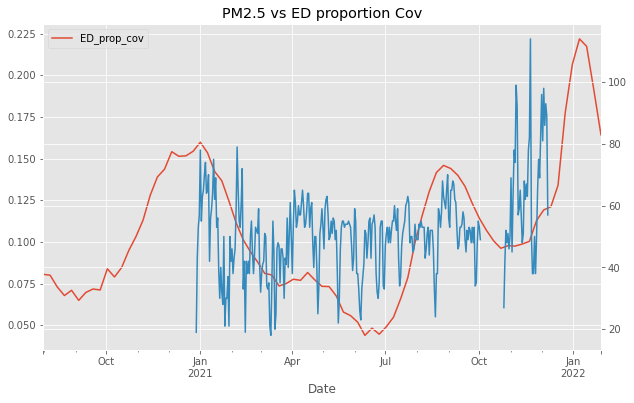

In [43]:
fig,ax = plt.subplots()
df_cov_gb_wk_med['prop_cov'].to_period('D') \
                            .plot(ax=ax, label='ED_prop_cov')
df_temp_test_aq_la.to_period('D').plot(ax=ax, 
                                       secondary_y=['pm25'], 
                                       grid=True)
ax.legend()
ax.title.set_text('PM2.5 vs ED proportion Cov')


In [45]:
import statsmodels.formula.api as sm

In [51]:
# pm25_cov_lr = sm.ols(...).fit()
# pm25_cov_lr.describe()

# would have been haphazard look at R^2, etc., but shape differs--furthermore period differs (wk vs day)

In [50]:
df_cov_gb_wk_med['prop_cov'].sort_index()

collection_week
2020-07-31    0.080569
2020-08-07    0.080000
2020-08-14    0.072961
2020-08-21    0.067797
2020-08-28    0.070938
                ...   
2021-12-31    0.206522
2022-01-07    0.221893
2022-01-14    0.217391
2022-01-21    0.191419
2022-01-28    0.164336
Name: prop_cov, Length: 79, dtype: float64

In [49]:
df_temp_test_aq_la

Date
2020-12-28    19.0
2020-12-29    43.0
2020-12-30    53.0
2020-12-31    57.0
2021-01-01    78.0
              ... 
2021-12-03    98.0
2021-12-04    86.0
2021-12-05    93.0
2021-12-06    89.0
2021-12-07    57.0
Name: pm25, Length: 324, dtype: float64

In [ ]:
#TODO spread weekly sum of COV data over 7 day periods
## consider if there is a better way to do this, per 
### SIGNIFICANT per all COVID data from HHS is reported weekly